In [34]:
import numpy as np
import pandas as pd

from sklearn import svm 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from scipy import stats
from fitter import Fitter 
import copy 

In [2]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# set style of graphs
plt.style.use('dark_background')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

# Data cleaning

In [3]:
# Import data
games = pd.read_csv("nba_game_data/games.csv")
teams = pd.read_csv("nba_game_data/teams.csv")
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [4]:
games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [5]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


# check for any null value

In [6]:
games.isnull().values.any() 

True

# remove null value

In [7]:
# sort by date
games = games.sort_values(by='GAME_DATE_EST').reset_index(drop = True)

# drop data before 2004 as it contains null value
games = games.loc[games['GAME_DATE_EST'] >= "2004-01-01"].reset_index(drop=True)

# check null
games.isnull().values.any() 

False

In [8]:
teams = teams[['TEAM_ID', 'NICKNAME']]

# replace 'HOME_TEAM_ID' with names
replace_home_team = teams.copy() # copy data
replace_home_team.columns = ['HOME_TEAM_ID', 'NICKNAME'] # change name before merge

# merge name
merge_home_team = pd.merge(games['HOME_TEAM_ID'], replace_home_team, how ="left", on="HOME_TEAM_ID")  
games['HOME_TEAM_ID'] = merge_home_team['NICKNAME']

# replace 'VISITOR_TEAM_ID' with names
replace_visitor_team = teams.copy() # copy data
replace_visitor_team.columns = ['VISITOR_TEAM_ID', 'NICKNAME'] # change names before merge

# merge names 
merge_visitor_team = pd.merge(games['VISITOR_TEAM_ID'], replace_visitor_team, how = "left", on="VISITOR_TEAM_ID")
games['VISITOR_TEAM_ID'] = merge_visitor_team['NICKNAME']

In [9]:
# final dataframe

games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2004-01-02,20300458,Final,Timberwolves,Hawks,2003,1610612750,93.0,0.409,0.929,...,32.0,56.0,1610612737,75.0,0.372,0.737,0.375,22.0,31.0,1
1,2004-01-02,20300451,Final,Wizards,Warriors,2003,1610612764,97.0,0.446,0.611,...,30.0,58.0,1610612744,79.0,0.403,0.818,0.381,20.0,36.0,1
2,2004-01-02,20300454,Final,Knicks,Bulls,2003,1610612752,99.0,0.470,0.800,...,25.0,38.0,1610612741,104.0,0.488,0.724,0.385,20.0,44.0,0
3,2004-01-02,20300457,Final,Pistons,Suns,2003,1610612765,93.0,0.389,0.947,...,26.0,54.0,1610612756,81.0,0.395,0.895,0.364,20.0,34.0,1
4,2004-01-02,20300456,Final,Heat,Magic,2003,1610612748,112.0,0.466,0.792,...,29.0,42.0,1610612753,101.0,0.430,0.750,0.450,15.0,37.0,1


In [10]:
# predict 2020-2021 NBA play off

cutoff_date = '2021-012-22'

games = games.loc[games['GAME_DATE_EST'] < cutoff_date].reset_index(drop=True)

In [11]:
# see different features

features_all = list(games.columns)
features_all

['GAME_DATE_EST',
 'GAME_ID',
 'GAME_STATUS_TEXT',
 'HOME_TEAM_ID',
 'VISITOR_TEAM_ID',
 'SEASON',
 'TEAM_ID_home',
 'PTS_home',
 'FG_PCT_home',
 'FT_PCT_home',
 'FG3_PCT_home',
 'AST_home',
 'REB_home',
 'TEAM_ID_away',
 'PTS_away',
 'FG_PCT_away',
 'FT_PCT_away',
 'FG3_PCT_away',
 'AST_away',
 'REB_away',
 'HOME_TEAM_WINS']

# Feature selection

In [12]:
# classifier which takes features as input

features_selected = [
    'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
    'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away',
    ]

X = games[features_selected]
X.head()

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0.409,0.929,0.308,32.0,56.0,0.372,0.737,0.375,22.0,31.0
1,0.446,0.611,0.400,30.0,58.0,0.403,0.818,0.381,20.0,36.0
2,0.470,0.800,0.333,25.0,38.0,0.488,0.724,0.385,20.0,44.0
3,0.389,0.947,0.238,26.0,54.0,0.395,0.895,0.364,20.0,34.0
4,0.466,0.792,0.500,29.0,42.0,0.430,0.750,0.450,15.0,37.0


In [13]:
# targets
y = games['HOME_TEAM_WINS']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: HOME_TEAM_WINS, dtype: int64

In [14]:
# the below roster is based on 2020-2021 NBA playoffs

playoff_bracket = [
     # Eastern Conference
     ('76ers', 'Wizards'),  # group A 
     ('Knicks', 'Hawks'), # group B
    
     ('Bucks', 'Heat'), # group C
     ('Nets', 'Celtics'), # group D
    
     # Western Conference
     ('Jazz','Grizzlies'),  # group E
     ('Clippers','Mavericks'), # group F
    
     ('Nuggets', 'Trail Blazers'), # group G
     ('Suns', 'Lakers')] # group H

In [39]:
# Evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    print(f'\nModel: {model_name}')
    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    
    return accuracy, classification_rep

# Logistic Regression

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Initialize and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Evaluate Neural Network
logistic_accuracy, logistic_report = evaluate_model(logistic_regression, X_test, y_test, 'Logistic Regression')


Model: Logistic Regression
Accuracy: 0.8313641245972073
Confusion Matrix:
[[1580  415]
 [ 370 2290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1995
           1       0.85      0.86      0.85      2660

    accuracy                           0.83      4655
   macro avg       0.83      0.83      0.83      4655
weighted avg       0.83      0.83      0.83      4655



In [51]:
# Define parameter grid for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga', 'liblinear', 'lbfgs']
}

In [52]:
# Setup GridSearchCV for Logistic Regression
grid_search_logistic = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                                    param_grid_logistic, 
                                    cv=5, 
                                    scoring='accuracy', 
                                    n_jobs=-1)

In [55]:
# Perform Grid Search
print("Performing Grid Search for Logistic Regression...")
grid_search_logistic.fit(X_train, y_train)



Performing Grid Search for Logistic Regression...


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.d

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga', 'liblinear', 'lbfgs']},
             scoring='accuracy')

In [56]:
# Get the best parameters and evaluate the tuned model
best_params = grid_search_logistic.best_params_
print(f"Best Parameters for Logistic Regression: {best_params}")

# Evaluate the tuned Logistic Regression model
print("Evaluating Logistic Regression with Tuned Parameters...")
tuned_accuracy = evaluate_model(grid_search_logistic.best_estimator_, X_test, y_test, "Logistic Regression (Tuned)")

Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Evaluating Logistic Regression with Tuned Parameters...

Model: Logistic Regression (Tuned)
Accuracy: 0.8313641245972073
Confusion Matrix:
[[1580  415]
 [ 370 2290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1995
           1       0.85      0.86      0.85      2660

    accuracy                           0.83      4655
   macro avg       0.83      0.83      0.83      4655
weighted avg       0.83      0.83      0.83      4655



# Random Forest

In [35]:
# Initialize and train Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Evaluate Neural Network
rf_accuracy, rf_report = evaluate_model(random_forest, X_test, y_test, 'Random Forest')


Model: Random Forest
Accuracy: 0.8253490870032223
Confusion Matrix:
[[1554  441]
 [ 372 2288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1995
           1       0.84      0.86      0.85      2660

    accuracy                           0.83      4655
   macro avg       0.82      0.82      0.82      4655
weighted avg       0.82      0.83      0.82      4655



# Neural Network

In [48]:
# Initialize and train Neural Network
neural_network = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
neural_network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)

In [49]:
# Evaluate Neural Network
nn_accuracy, nn_report = evaluate_model(neural_network, X_test, y_test, 'Neural Network')


Model: Neural Network
Accuracy: 0.8111707841031149
Confusion Matrix:
[[1534  461]
 [ 418 2242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1995
           1       0.83      0.84      0.84      2660

    accuracy                           0.81      4655
   macro avg       0.81      0.81      0.81      4655
weighted avg       0.81      0.81      0.81      4655



C:\Users\eugen\AppData\Local\Temp\ipykernel_17688\3097855640.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


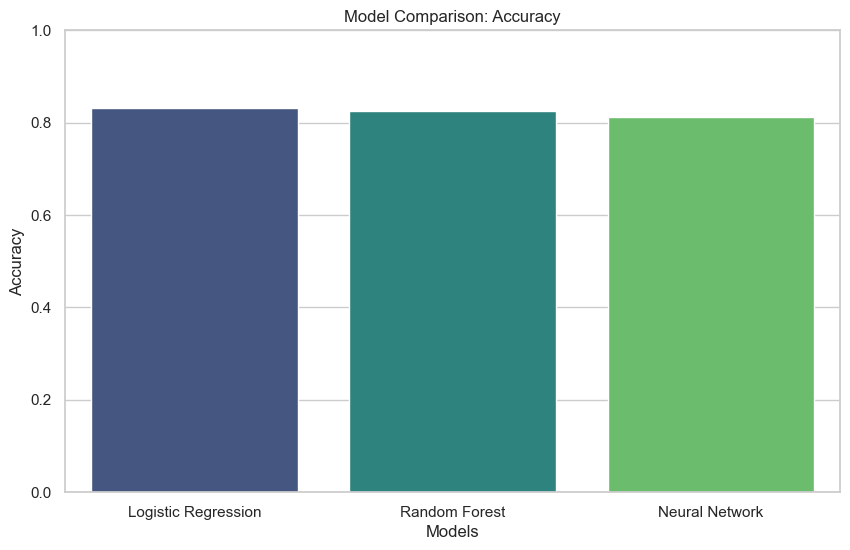

C:\Users\eugen\AppData\Local\Temp\ipykernel_17688\3097855640.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette='viridis')


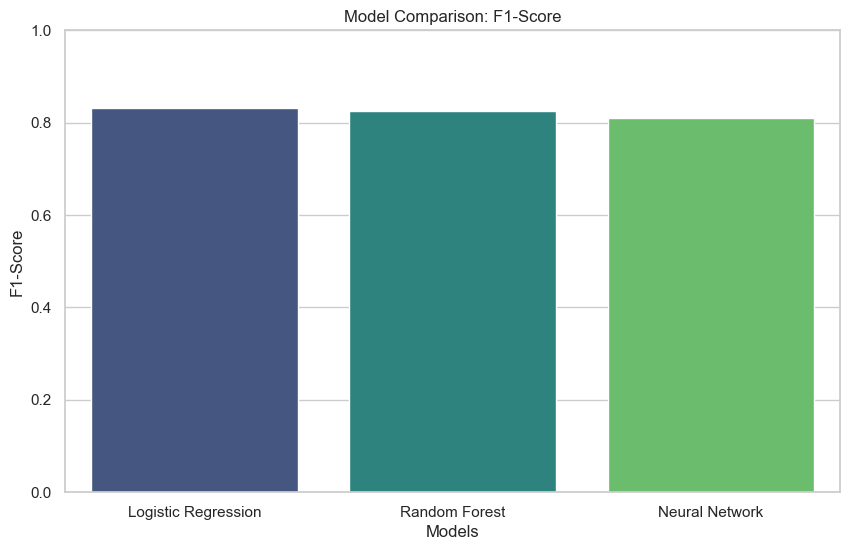

In [50]:

# Compare the models based on accuracy
models = ['Logistic Regression', 'Random Forest', 'Neural Network']
accuracies = [logistic_accuracy, rf_accuracy, nn_accuracy]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison: Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

# Additional comparison using F1-score for better insight
f1_scores = [logistic_report['weighted avg']['f1-score'], 
             rf_report['weighted avg']['f1-score'], 
             nn_report['weighted avg']['f1-score']]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=f1_scores, palette='viridis')
plt.title('Model Comparison: F1-Score')
plt.ylabel('F1-Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

In [20]:
# Helper function to simulate a Best-of-7 series
def simulate_series(home_team, away_team, model, scaler):
    home_wins = 0
    away_wins = 0

    # Simulate up to 7 games
    for game in range(7):
        # Extract team stats from the dataset
        home_stats = games.loc[games['HOME_TEAM_ID'] == home_team].iloc[0]
        away_stats = games.loc[games['VISITOR_TEAM_ID'] == away_team].iloc[0]

        # Prepare game data for prediction
        game_data = pd.DataFrame({
            'FG_PCT_home': [home_stats['FG_PCT_home']], 
            'FT_PCT_home': [home_stats['FT_PCT_home']],
            'FG3_PCT_home': [home_stats['FG3_PCT_home']], 
            'AST_home': [home_stats['AST_home']], 
            'REB_home': [home_stats['REB_home']],
            'FG_PCT_away': [away_stats['FG_PCT_away']], 
            'FT_PCT_away': [away_stats['FT_PCT_away']], 
            'FG3_PCT_away': [away_stats['FG3_PCT_away']], 
            'AST_away': [away_stats['AST_away']], 
            'REB_away': [away_stats['REB_away']]
        })

        # Standardize the data
        game_data_scaled = scaler.transform(game_data)

        # Predict the probability of the home team winning
        win_probability = model.predict_proba(game_data_scaled)[0][1]

        # Simulate game outcome based on probability
        if np.random.rand() < win_probability:
            home_wins += 1
        else:
            away_wins += 1

        # Check if one team has won 4 games
        if home_wins == 4:
            return home_team
        elif away_wins == 4:
            return away_team

In [21]:
# Helper function to run the playoffs simulation
def simulate_playoffs(playoff_bracket, model, scaler):
    round_num = 1
    while len(playoff_bracket) > 1:
        print(f"--- Round {round_num} ---")
        next_round = []

        for matchup in playoff_bracket:
            winner = simulate_series(matchup[0], matchup[1], model, scaler)
            print(f"{matchup[0]} vs {matchup[1]} -> Winner: {winner}")
            next_round.append(winner)

        # Pair up winners for the next round
        playoff_bracket = [(next_round[i], next_round[i + 1]) for i in range(0, len(next_round), 2)]
        round_num += 1

    # Final winner
    print(f"--- Championship Winner: {playoff_bracket[0][0]} ---")

In [31]:
# Run the playoffs simulation - logistic regression
simulate_playoffs(playoff_bracket, logistic_regression, scaler)

--- Round 1 ---
76ers vs Wizards -> Winner: 76ers
Knicks vs Hawks -> Winner: Knicks
Bucks vs Heat -> Winner: Bucks
Nets vs Celtics -> Winner: Nets
Jazz vs Grizzlies -> Winner: Jazz
Clippers vs Mavericks -> Winner: Mavericks
Nuggets vs Trail Blazers -> Winner: Trail Blazers
Suns vs Lakers -> Winner: Lakers
--- Round 2 ---
76ers vs Knicks -> Winner: Knicks
Bucks vs Nets -> Winner: Bucks
Jazz vs Mavericks -> Winner: Jazz
Trail Blazers vs Lakers -> Winner: Trail Blazers
--- Round 3 ---
Knicks vs Bucks -> Winner: Knicks
Jazz vs Trail Blazers -> Winner: Jazz
--- Championship Winner: Knicks ---


In [37]:
# Run the playoffs simulation - random forest
simulate_playoffs(playoff_bracket, random_forest, scaler)

--- Round 1 ---
76ers vs Wizards -> Winner: 76ers
Knicks vs Hawks -> Winner: Knicks
Bucks vs Heat -> Winner: Bucks
Nets vs Celtics -> Winner: Nets
Jazz vs Grizzlies -> Winner: Jazz
Clippers vs Mavericks -> Winner: Mavericks
Nuggets vs Trail Blazers -> Winner: Trail Blazers
Suns vs Lakers -> Winner: Lakers
--- Round 2 ---
76ers vs Knicks -> Winner: Knicks
Bucks vs Nets -> Winner: Bucks
Jazz vs Mavericks -> Winner: Jazz
Trail Blazers vs Lakers -> Winner: Trail Blazers
--- Round 3 ---
Knicks vs Bucks -> Winner: Knicks
Jazz vs Trail Blazers -> Winner: Jazz
--- Championship Winner: Knicks ---


In [58]:
# Run the playoffs simulation - Neural Network
simulate_playoffs(playoff_bracket, neural_network, scaler)

--- Round 1 ---
76ers vs Wizards -> Winner: 76ers
Knicks vs Hawks -> Winner: Knicks
Bucks vs Heat -> Winner: Bucks
Nets vs Celtics -> Winner: Nets
Jazz vs Grizzlies -> Winner: Jazz
Clippers vs Mavericks -> Winner: Mavericks
Nuggets vs Trail Blazers -> Winner: Trail Blazers
Suns vs Lakers -> Winner: Lakers
--- Round 2 ---
76ers vs Knicks -> Winner: Knicks
Bucks vs Nets -> Winner: Bucks
Jazz vs Mavericks -> Winner: Jazz
Trail Blazers vs Lakers -> Winner: Trail Blazers
--- Round 3 ---
Knicks vs Bucks -> Winner: Bucks
Jazz vs Trail Blazers -> Winner: Trail Blazers
--- Championship Winner: Bucks ---


C:\Users\eugen\AppData\Local\Temp\ipykernel_17688\407983310.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='HOME_TEAM_ID', y='PTS_home', data=games, ci=None, color='blue', label='Home Points')
C:\Users\eugen\AppData\Local\Temp\ipykernel_17688\407983310.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='VISITOR_TEAM_ID', y='PTS_away', data=games, ci=None, color='red', label='Away Points')


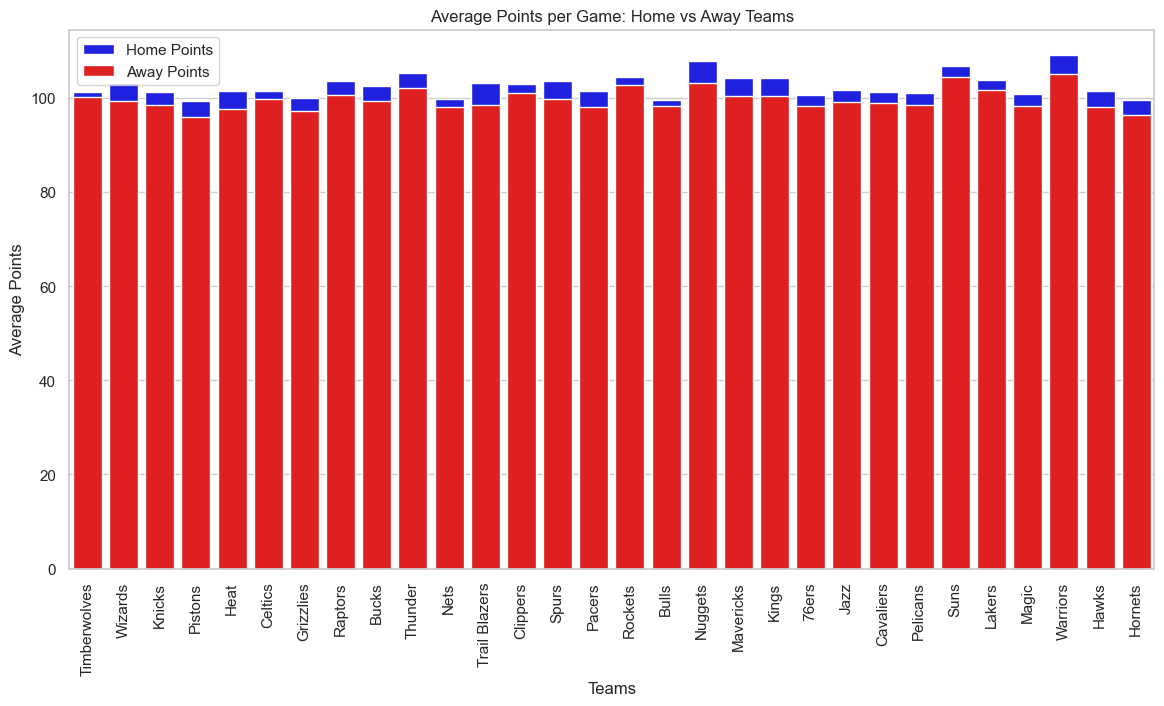

In [26]:
# Set the style for Seaborn
sns.set(style='whitegrid')
# 1. Bar Plot of Average Points per Game for Home vs Away Teams
plt.figure(figsize=(14, 7))
sns.barplot(x='HOME_TEAM_ID', y='PTS_home', data=games, ci=None, color='blue', label='Home Points')
sns.barplot(x='VISITOR_TEAM_ID', y='PTS_away', data=games, ci=None, color='red', label='Away Points')
plt.xticks(rotation=90)
plt.title('Average Points per Game: Home vs Away Teams')
plt.xlabel('Teams')
plt.ylabel('Average Points')
plt.legend()
plt.show()

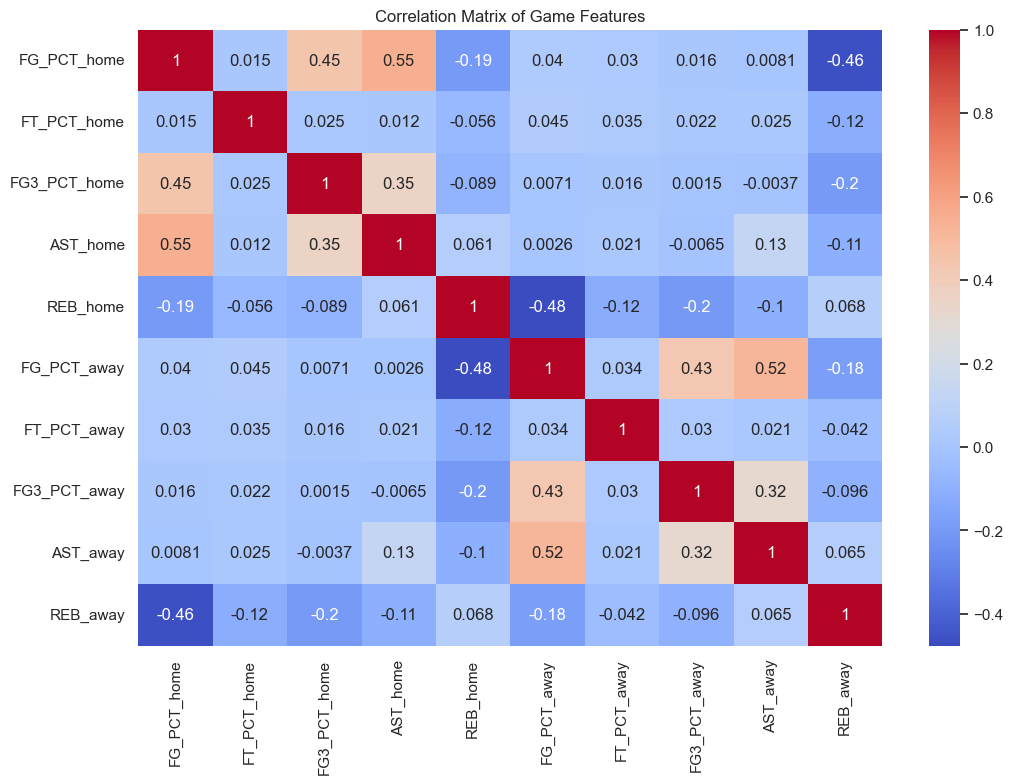

In [27]:
# 2. Heatmap of Feature Correlations
plt.figure(figsize=(12, 8))
correlation_matrix = games[features_selected].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Game Features')
plt.show()

In [32]:
# train SVM

clf = svm.SVC(kernel='linear') # create SVM model using linear kernel

clf.fit(X_train, y_train) # train the model

# check test score 
y_pred = clf.predict(X_test) 
print('balanced accuracy score:', balanced_accuracy_score(y_test, y_pred)) 

balanced accuracy score: 0.8257518796992481
